<div style="font-family: 'Trebuchet MS';">

<div align="center" style="padding-top: 5%;">

##### **Laboratorio #2 - CompuAlpes**

</div>

##### **Integrantes**

<div style="font-size: 15px; padding: 5%;">

Ronald Pardo - 202111309 - r.diazp <br> <br>
lorem - 123 - lore.m <br> <br>
lorem - 123 - lore.m <br> <br>

</div>

</div>

<div style="font-family: 'Trebuchet MS';">

<div align="center" style="padding-top: 5%;">

##### **Contenidos**

</div>

<div style="font-size: 15px; padding: 5%;">

[1. Carga de datos](#1-carga-de-datos) <br> <br>
[2. Entendimiento de datos](#2-entendimiento-de-datos) <br> <br>
[3. Limpieza de datos](#3-limpieza-de-datos) <br> <br>
[4. Preparacion de datos](#4-preparacion-de-datos) <br> <br>
[5. Particionamiento del conjunto de datos en entrenamiento y prueba](#5-particionamiento-del-conjunto-de-datos-en-entrenamiento-y-prueba) <br> <br>
[6. Entrenamiento de un primer modelo de regresion lineal](#6-entrenamiento-de-un-primer-modelo-de-regresion-lineal) <br> <br>
[7. Entrenamiento de un segundo modelo aplicando normalizacion](#7-entrenamiento-de-un-segundo-modelo-aplicando-normalizacion) <br> <br>
[8. Eleccion de mejor modelo de regresion](#8-eleccion-de-mejor-modelo-de-regresion) <br> <br>
[9. Implementación del pipeline con todas las transformaciones requeridas para la generación de predicciones](#9-implementación-del-pipeline-con-todas-las-transformaciones-requeridas-para-la-generación-de-predicciones) <br> <br>
[10. Exploración de los supuestos de la regresión a partir del mejor modelo](#10-exploración-de-los-supuestos-de-la-regresión-a-partir-del-mejor-modelo) <br> <br>
[11. Desarrollo de las transformaciones complementarias para cumplir con los supuestos de la regresión](#11-desarrollo-de-las-transformaciones-complementarias-para-cumplir-con-los-supuestos-de-la-regresión) <br> <br>
[12. Interpretación de los coeficientes del modelo](#12-interpretación-de-los-coeficientes-del-modelo) <br> <br>
[13. Presentación para CompuAlpes con resultados a nivel cuantitativo y cualitativo del mejor modelo construido](#13-presentación-para-compualpes-con-resultados-a-nivel-cuantitativo-y-cualitativo-del-mejor-modelo-construido) <br> <br>
[14. Recomendaciones dadas a CompuAlpes y visualizaciones extraidas del notebook y/o tablero de control](#14-recomendaciones-dadas-a-compualpes-y-visualizaciones-extraidas-del-notebook-y-o-tablero-de-control) <br> <br>
[15. Tablero de control](#15-tablero-de-control) <br> <br>
[16. Persistencia del archivo de predicciones sobre los datos de prueba (CSV)](#16-persistencia-del-archivo-de-predicciones-sobre-los-datos-de-prueba-csv)

</div>

</div>

 ##### **1. Carga de datos**

In [1]:
import numpy as np
import pandas as pd

from joblib import dump, load

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import scipy.stats as stats

In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 50)

In [3]:
train_data = pd.read_csv("data/train_data.csv")
val_data = pd.read_csv("data/val_data.csv")

In [4]:
train_data.shape, val_data.shape

((2132, 34), (915, 33))

In [5]:
extra_columns_train = set(train_data.columns) - set(val_data.columns)
extra_columns_train

{'deathRate'}

In [6]:
train_data.dtypes

avgAnnCount                float64
avgDeathsPerYear             int64
incidenceRate              float64
medIncome                    int64
popEst2015                   int64
povertyPercent             float64
studyPerCap                float64
binnedInc                   object
MedianAge                  float64
MedianAgeMale              float64
MedianAgeFemale            float64
Geography                   object
AvgHouseholdSize           float64
PercentMarried             float64
PctNoHS18_24               float64
PctHS18_24                 float64
PctSomeCol18_24            float64
PctBachDeg18_24            float64
PctHS25_Over               float64
PctBachDeg25_Over          float64
PctEmployed16_Over         float64
PctUnemployed16_Over       float64
PctPrivateCoverage         float64
PctPrivateCoverageAlone    float64
PctEmpPrivCoverage         float64
PctPublicCoverage          float64
PctPublicCoverageAlone     float64
PctWhite                   float64
PctBlack            

In [7]:
val_data.dtypes

avgAnnCount                float64
avgDeathsPerYear             int64
incidenceRate              float64
medIncome                    int64
popEst2015                   int64
povertyPercent             float64
studyPerCap                float64
binnedInc                   object
MedianAge                  float64
MedianAgeMale              float64
MedianAgeFemale            float64
Geography                   object
AvgHouseholdSize           float64
PercentMarried             float64
PctNoHS18_24               float64
PctHS18_24                 float64
PctSomeCol18_24            float64
PctBachDeg18_24            float64
PctHS25_Over               float64
PctBachDeg25_Over          float64
PctEmployed16_Over         float64
PctUnemployed16_Over       float64
PctPrivateCoverage         float64
PctPrivateCoverageAlone    float64
PctEmpPrivCoverage         float64
PctPublicCoverage          float64
PctPublicCoverageAlone     float64
PctWhite                   float64
PctBlack            

In [8]:
train_data.sample(5)

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,deathRate
319,85.000000,34,486.200000,39563,12298,15.0,0.000000,"(37413.8, 40362.7]",43.3,41.8,45.8,"Blackford County, Indiana",2.35,54.3,18.8,47.6,NaN,1.6,49.5,6.6,51.6,9.8,61.7,NaN,40.5,39.3,19.8,97.443091,0.577108,0.248477,0.032062,51.778883,6.987762,189.1
308,152.000000,70,501.800000,37625,23372,22.1,0.000000,"(37413.8, 40362.7]",41.9,41.2,43.2,"Boone County, West Virginia",2.50,55.2,21.3,42.9,NaN,5.2,49.4,5.4,39.5,9.2,60.2,42.8,41.3,46.3,25.4,98.312500,0.675000,0.091667,0.129167,53.063790,4.220288,236.7
1191,13.000000,6,441.600000,43618,1579,14.2,0.000000,"(42724.4, 45201]",49.6,50.1,49.4,"Throckmorton County, Texas",2.17,56.3,15.7,54.2,NaN,6.0,31.3,17.2,53.8,2.6,56.4,NaN,28.6,40.5,20.1,97.087379,0.194175,0.517799,0.000000,50.641940,7.986111,200.7
67,360.000000,153,422.700000,47705,78572,17.0,1374.535458,"(45201, 48021.6]",36.0,35.2,37.3,"Cape Girardeau County, Missouri",2.49,49.2,9.0,20.9,NaN,8.4,32.0,18.1,60.3,6.3,74.2,NaN,51.9,28.8,13.8,88.312759,7.646316,1.313043,0.454862,50.434637,4.895141,170.3
1065,1962.667684,12,453.549422,54536,6396,10.3,0.000000,"(51046.4, 54545.6]",43.7,41.9,45.7,"Wilkin County, Minnesota",2.29,56.0,16.1,28.6,48.2,7.0,30.5,13.5,64.6,2.0,79.1,NaN,49.2,30.4,12.7,96.705486,0.321790,0.229850,0.030647,51.909222,7.810107,122.5


In [9]:
val_data.sample(5)

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
192,245.0,101,423.7,66950,56482,10.2,0.0,"(61494.5, 125635]",39.7,39.9,39.3,"Jefferson County, West Virginia",2.6500,53.3,14.1,24.5,55.3,6.2,32.1,18.2,60.3,8.4,73.3,58.6,53.8,29.2,14.6,88.242113,6.965625,1.622777,0.566885,54.099651,4.995520
223,117.0,56,444.8,37632,17860,20.1,0.0,"(37413.8, 40362.7]",45.7,44.5,47.4,"Unicoi County, Tennessee",2.3600,52.8,8.5,35.6,NaN,2.2,41.6,7.5,NaN,13.7,57.8,37.3,32.5,46.9,24.4,97.039128,0.802479,0.282251,1.029387,50.296177,6.395035
567,181.0,81,427.4,43998,31914,13.7,0.0,"(42724.4, 45201]",43.6,42.4,44.7,"Amherst County, Virginia",0.0248,50.1,9.5,36.1,NaN,8.0,35.7,12.2,NaN,6.6,68.8,NaN,46.2,34.5,18.0,76.835262,18.393057,0.749658,0.824313,50.967845,5.278871
247,383.0,159,438.0,39234,66016,21.9,0.0,"(37413.8, 40362.7]",42.5,41.9,43.1,"Klamath County, Oregon",2.3900,51.4,20.0,30.9,45.5,3.6,29.9,12.6,48.4,12.4,58.1,40.6,33.3,44.1,24.4,88.499667,0.892803,1.156551,1.765901,48.219803,6.075036
85,98.0,44,508.0,33134,13786,27.4,0.0,"[22640, 34218.1]",42.3,40.6,43.4,"Bienville Parish, Louisiana",2.3500,43.4,20.3,39.6,35.1,5.0,42.7,7.1,46.4,10.1,53.6,NaN,34.0,44.2,24.3,55.598483,41.947485,0.007155,1.101810,40.161679,7.939133


##### **2. Entendimiento de datos**

In [10]:
train_data.describe()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,deathRate
count,2132.000000,2132.000000,2132.000000,2132.000000,2.132000e+03,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,528.000000,2132.000000,2132.000000,2132.000000,2017.000000,2132.000000,2132.000000,1704.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000
mean,613.385785,183.537992,448.816467,47029.474203,1.025064e+05,16.889681,158.003002,44.298687,39.559475,42.140009,2.479013,51.756285,18.134897,34.981660,41.151705,6.201173,34.949578,13.225797,54.119137,7.843574,64.393011,48.407688,41.237899,36.305113,19.282786,83.686321,9.132512,1.260485,1.953356,51.228950,5.643918,179.000047
std,1435.393846,507.649052,53.582307,12107.930677,3.442282e+05,6.415614,533.636824,39.522898,5.208212,5.272267,0.421538,6.925242,8.091987,9.024105,11.046405,4.628540,7.056699,5.395211,8.398898,3.448596,10.670887,9.985504,9.326155,7.847326,6.136426,16.588379,14.613785,2.745672,3.484569,6.565620,1.980214,27.416156
min,6.000000,3.000000,201.300000,22640.000000,8.290000e+02,3.200000,0.000000,23.500000,22.800000,22.800000,0.022100,23.100000,0.000000,0.000000,7.100000,0.000000,7.500000,2.500000,17.600000,0.700000,22.300000,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000,59.700000
25%,77.000000,28.000000,421.600000,38875.750000,1.154725e+04,12.200000,0.000000,37.700000,36.300000,39.000000,2.360000,47.775000,12.700000,29.200000,34.000000,3.100000,30.600000,9.300000,48.600000,5.500000,57.175000,41.275000,34.600000,30.975000,14.900000,77.560360,0.614838,0.263542,0.278374,47.749949,4.520411,161.875000
50%,174.500000,62.000000,453.549422,45207.000000,2.693200e+04,15.900000,0.000000,40.900000,39.600000,42.300000,2.500000,52.300000,17.100000,34.700000,40.600000,5.400000,35.400000,12.300000,54.400000,7.600000,65.300000,48.800000,41.300000,36.400000,18.900000,90.122747,2.214754,0.538013,0.781727,51.595091,5.383877,178.550000
75%,515.250000,141.000000,481.600000,52376.250000,6.663525e+04,20.300000,79.275307,44.000000,42.600000,45.400000,2.630000,56.500000,22.425000,40.700000,46.725000,8.300000,39.800000,16.100000,60.300000,9.700000,72.100000,55.500000,47.600000,41.425000,23.200000,95.600016,10.709158,1.190457,2.171349,55.398869,6.478029,195.300000
max,38150.000000,14010.000000,1014.200000,125635.000000,1.017029e+07,47.400000,9439.200444,619.200000,64.700000,65.700000,3.970000,72.500000,64.100000,65.700000,79.000000,51.800000,54.800000,42.200000,80.100000,29.400000,92.300000,78.200000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,37.859023,78.075397,21.326165,293.900000


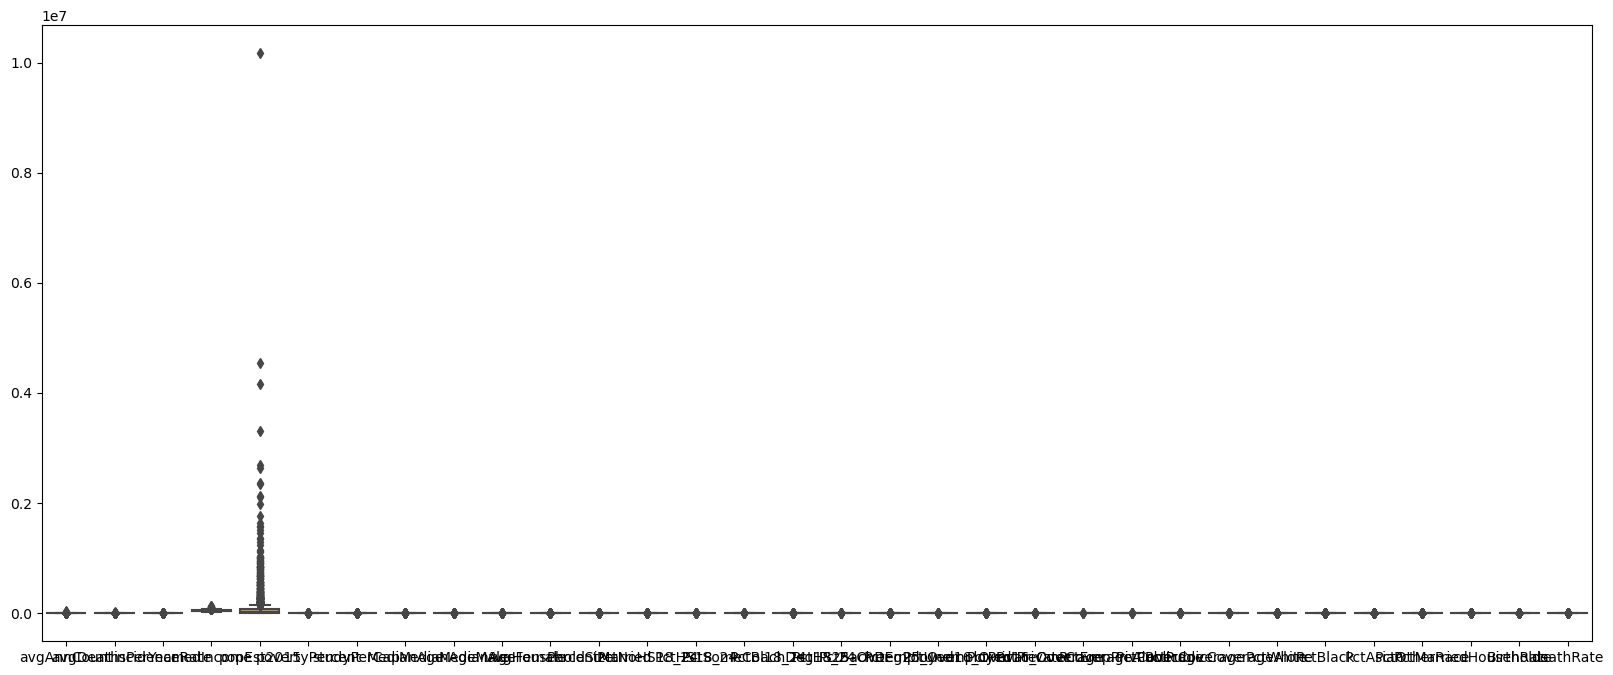

In [11]:
fig = plt.figure(figsize=(20,8))
ax = sns.boxplot(data=train_data, orient="v")

In [12]:
# Inicialmente identificamos a las columnas que sean de tipo object para ver si podemos convertirlas a numéricas
train_data.select_dtypes(include=["object"]).head()

,binnedInc,Geography
0,"(34218.1, 37413.8]","Gregory County, South Dakota"
1,"(48021.6, 51046.4]","Taylor County, Wisconsin"
2,"(54545.6, 61494.5]","Bowman County, North Dakota"
3,"[22640, 34218.1]","Quitman County, Georgia"
4,"(37413.8, 40362.7]","Owyhee County, Idaho"


In [13]:
"""
Luego nos damos cuenta que binnedInc hace referencia al ingreso mediano per capita (clasificado por decil), por lo cual podriamos tomar las siguientes decisiones:

1. Convertir las categorias a valores numéricos, por ejemplo, 1-10 -> 5.5
2. Mantener una columna para el rango inferior y otra para el rango superior

Antes de decidir vamos a ver diferencia entre los valores de binnedInc, para ver si es significativa
binnedInc	Geography
0	(34218.1, 37413.8]	Gregory County, South Dakota
1	(48021.6, 51046.4]	Taylor County, Wisconsin
2	(54545.6, 61494.5]	Bowman County, North Dakota
3	[22640, 34218.1]	Quitman County, Georgia
4	(37413.8, 40362.7]	Owyhee County, Idaho
"""

# Obtener parejas de valores únicos de binnedInc en una lista para visualizarlas de la siguiente forma: pairs = [(a,b),(c.d),...]
pairs = train_data["binnedInc"].unique()
for i in range(len(pairs)):
    pairs[i] = pairs[i].strip("[]()").split(", ")
    pairs[i] = (float(pairs[i][0]), float(pairs[i][1]))
print("\nPairs:")
print(pairs[0])
print(pairs)
print("\n")

# Value counts de binnedInc
print(f"Unique values from original data:\n{train_data['binnedInc'].unique()}\n")
print(f"Len of uniques: {len(train_data['binnedInc'].unique())}\nLen of pairs: {len(pairs)}\n")

# Diferencia promedio entre los valores de binnedInc, diferencia maxima y minima, y desviacion estandar
diffs = [abs(pair[1] - pair[0]) for pair in pairs]
print(f"Mean difference between pairs: {np.mean(diffs)}")
print(f"Max difference between pairs: {np.max(diffs)}\nPair with max difference: {pairs[np.argmax(diffs)]}")
print(f"Min difference between pairs: {np.min(diffs)}")
print(f"Standard deviation of differences: {np.std(diffs)}")




Pairs:
(34218.1, 37413.8)
[(34218.1, 37413.8) (48021.6, 51046.4) (54545.6, 61494.5)
 (22640.0, 34218.1) (37413.8, 40362.7) (40362.7, 42724.4)
 (51046.4, 54545.6) (61494.5, 125635.0) (42724.4, 45201.0)
 (45201.0, 48021.6)]


Unique values from original data:
['(34218.1, 37413.8]' '(48021.6, 51046.4]' '(54545.6, 61494.5]'
 '[22640, 34218.1]' '(37413.8, 40362.7]' '(40362.7, 42724.4]'
 '(51046.4, 54545.6]' '(61494.5, 125635]' '(42724.4, 45201]'
 '(45201, 48021.6]']

Len of uniques: 10
Len of pairs: 10

Mean difference between pairs: 10299.5
Max difference between pairs: 64140.5
Pair with max difference: (61494.5, 125635.0)
Min difference between pairs: 2361.7000000000044
Standard deviation of differences: 18153.555113971477


In [14]:
""" 
Mean difference between pairs: 10299.5
Max difference between pairs: 64140.5
Pair with max difference: (61494.5, 125635.0)
Min difference between pairs: 2361.7000000000044
Standard deviation of differences: 18153.555113971477

Nos podemos dar cuenta de que el valor de la pareja con el valor maximo de diferencia tiene un valor de 61494.5, el cual es mayor comparado al resto de valores.

Adicionalmente, teniendo en cuenta que esta columna hace referencia a ingresos y los los ingresos mayores son mucho mayores que los menores, entonces podriamos inferir que estos hacen referencia a ingresos altos, por lo que puede existir diferencia significativa entre los valores de rangos de zonas ricas, por lo que podriamos considerar convertirlos a un promedio de los valores de la pareja, por ejemplo, (34218.1, 37413.8] -> 35815.95
"""

"""  
En lo que respecta a geografia, no tenemos valores de latitud y longitud por lo que no podriamos usarlo como un valor importante para el modelo.
"""

# features = todas las columnas menos Geography, deathRate

features = train_data.columns.drop(["Geography", "deathRate"])
features

Index(['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'medIncome',
       'popEst2015', 'povertyPercent', 'studyPerCap', 'binnedInc', 'MedianAge',
       'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize',
       'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctSomeCol18_24',
       'PctBachDeg18_24', 'PctHS25_Over', 'PctBachDeg25_Over',
       'PctEmployed16_Over', 'PctUnemployed16_Over', 'PctPrivateCoverage',
       'PctPrivateCoverageAlone', 'PctEmpPrivCoverage', 'PctPublicCoverage',
       'PctPublicCoverageAlone', 'PctWhite', 'PctBlack', 'PctAsian',
       'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate'],
      dtype='object')

In [15]:
"""   
Analisis de completitud de datos
"""

train_data.isnull().sum() / len(train_data)

avgAnnCount                0.000000
avgDeathsPerYear           0.000000
incidenceRate              0.000000
medIncome                  0.000000
popEst2015                 0.000000
povertyPercent             0.000000
studyPerCap                0.000000
binnedInc                  0.000000
MedianAge                  0.000000
MedianAgeMale              0.000000
MedianAgeFemale            0.000000
Geography                  0.000000
AvgHouseholdSize           0.000000
PercentMarried             0.000000
PctNoHS18_24               0.000000
PctHS18_24                 0.000000
PctSomeCol18_24            0.752345
PctBachDeg18_24            0.000000
PctHS25_Over               0.000000
PctBachDeg25_Over          0.000000
PctEmployed16_Over         0.053940
PctUnemployed16_Over       0.000000
PctPrivateCoverage         0.000000
PctPrivateCoverageAlone    0.200750
PctEmpPrivCoverage         0.000000
PctPublicCoverage          0.000000
PctPublicCoverageAlone     0.000000
PctWhite                   0

La columna PctSomeCol18_24 tiene un porcentaje de nulos de un 75%, lo cual es extremadamente alto y cualquier intento de reemplazar valores nulos con promedios o medianas puede no ser representativo de la naturaleza de los datos. Por lo cual se considera como mejor decision no tener en cuenta a esta columna en el modelo.

In [16]:
"""   
Analisis de unicidad de datos
"""

train_data.nunique() / len(train_data)

avgAnnCount                0.352251
avgDeathsPerYear           0.233114
incidenceRate              0.589118
medIncome                  0.968105
popEst2015                 0.987805
povertyPercent             0.148687
studyPerCap                0.361163
binnedInc                  0.004690
MedianAge                  0.134146
MedianAgeMale              0.130863
MedianAgeFemale            0.132270
Geography                  1.000000
AvgHouseholdSize           0.083490
PercentMarried             0.159006
PctNoHS18_24               0.175891
PctHS18_24                 0.200281
PctSomeCol18_24            0.135084
PctBachDeg18_24            0.097561
PctHS25_Over               0.159475
PctBachDeg25_Over          0.125235
PctEmployed16_Over         0.185272
PctUnemployed16_Over       0.085835
PctPrivateCoverage         0.219512
PctPrivateCoverageAlone    0.200281
PctEmpPrivCoverage         0.200750
PctPublicCoverage          0.174953
PctPublicCoverageAlone     0.140244
PctWhite                   0

De acuerdo a la naturaleza de los datos, es normal que los datos numericos (especialmente columnas de porcentajes, rates, edades y otras cosas de la poblacion) tengan duplicados, y tambien se identifica que no existen duplicados en la columna de Geography, ya que idealmente cada columna representa un condado, por lo que la unicidad de los datos es buena.

In [17]:
"""   
Analisis de validez de datos
"""

"""   
1. Los porcentajes deben estar entre 0 y 100
"""

percentage_cols = ["povertyPercent", "PercentMarried", "PctNoHS18_24", "PctHS18_24", "PctSomeCol18_24", "PctBachDeg18_24", "PctHS25_Over", "PctBachDeg25_Over", "PctEmployed16_Over", "PctUnemployed16_Over", "PctPrivateCoverage", "PctPrivateCoverageAlone", "PctEmpPrivCoverage", "PctPublicCoverage", "PctPublicCoverageAlone", "PctWhite", "PctBlack", "PctAsian", "PctOtherRace", "PctMarriedHouseholds"]

count_out_of_range = dict()
for col in percentage_cols:
    if count_out_of_range.get(col) is None:
        count_out_of_range[col] = 0
    for value in train_data[col]:
        if value < 0 or value > 100:
            count_out_of_range[col] += 1
            
count_out_of_range

{'povertyPercent': 0,
 'PercentMarried': 0,
 'PctNoHS18_24': 0,
 'PctHS18_24': 0,
 'PctSomeCol18_24': 0,
 'PctBachDeg18_24': 0,
 'PctHS25_Over': 0,
 'PctBachDeg25_Over': 0,
 'PctEmployed16_Over': 0,
 'PctUnemployed16_Over': 0,
 'PctPrivateCoverage': 0,
 'PctPrivateCoverageAlone': 0,
 'PctEmpPrivCoverage': 0,
 'PctPublicCoverage': 0,
 'PctPublicCoverageAlone': 0,
 'PctWhite': 0,
 'PctBlack': 0,
 'PctAsian': 0,
 'PctOtherRace': 0,
 'PctMarriedHouseholds': 0}

No hay ningun valor de porcentage con valores fuera de los rangos de los rangos esperados (0 a 100)

In [18]:
"""   
2. Debido a la naturaleza de los datos, no deberian existir valores negativos en ninguna columna numerica (int64 o float64)
"""

negative_cols = train_data.select_dtypes(include=["int64", "float64"]).columns
count_negative = dict()
for col in negative_cols:
    if count_negative.get(col) is None:
        count_negative[col] = 0
    for value in train_data[col]:
        if value < 0:
            count_negative[col] += 1
            
count_negative

{'avgAnnCount': 0,
 'avgDeathsPerYear': 0,
 'incidenceRate': 0,
 'medIncome': 0,
 'popEst2015': 0,
 'povertyPercent': 0,
 'studyPerCap': 0,
 'MedianAge': 0,
 'MedianAgeMale': 0,
 'MedianAgeFemale': 0,
 'AvgHouseholdSize': 0,
 'PercentMarried': 0,
 'PctNoHS18_24': 0,
 'PctHS18_24': 0,
 'PctSomeCol18_24': 0,
 'PctBachDeg18_24': 0,
 'PctHS25_Over': 0,
 'PctBachDeg25_Over': 0,
 'PctEmployed16_Over': 0,
 'PctUnemployed16_Over': 0,
 'PctPrivateCoverage': 0,
 'PctPrivateCoverageAlone': 0,
 'PctEmpPrivCoverage': 0,
 'PctPublicCoverage': 0,
 'PctPublicCoverageAlone': 0,
 'PctWhite': 0,
 'PctBlack': 0,
 'PctAsian': 0,
 'PctOtherRace': 0,
 'PctMarriedHouseholds': 0,
 'BirthRate': 0,
 'deathRate': 0}

In [ ]:
"""   
Analisis de consistencia de datos
"""

"""   
1. Ciertos valores relacionados con numero de personas deben de tener valores netamente enteros.

Columnas que deben de cumplir esto: avgAnnCount, avgDeathsPerYear, incidenceRate, poEst2015, studyPerCap, AvgHouseholdSize, BirthRate
"""

##### **3. Limpieza de datos**

##### **4. Preparacion de datos**

##### **5. Particionamiento del conjunto de datos en entrenamiento y prueba**

##### **6. Entrenamiento de un primer modelo de regresion lineal**

##### **7. Entrenamiento de un segundo modelo aplicando normalizacion**

##### **8. Eleccion de mejor modelo de regresion**

##### **9. Implementación del pipeline con todas las transformaciones requeridas para la generación de predicciones**

##### **10. Exploración de los supuestos de la regresión a partir del mejor modelo**

##### **11. Desarrollo de las transformaciones complementarias para cumplir con los supuestos de la regresión**

##### **12. Interpretación de los coeficientes del modelo**

##### **13. Presentación para CompuAlpes con resultados a nivel cuantitativo y cualitativo del mejor modelo construido**

##### **14. Recomendaciones dadas a CompuAlpes y visualizaciones extraidas del notebook y/o tablero de control**

##### **15. Tablero de control**

##### **16. Persistencia del archivo de predicciones sobre los datos de prueba (CSV)**